# Integrating SC and ST data in human liver dataset

## Data preprocessing
 
For the SC data, we select one tumor core region at a time for integration (tumor core T1 for this script), aligning with the ST data from normal human liver.

In [1]:
import stSCI
import scanpy as sc

sc_adata = sc.read_h5ad('../mapping_script/data/data/liver/sc_liver_multi_region.h5ad')
sc_adata = sc_adata['Tumor core T1' == sc_adata.obs['region']]
sc_adata.var_names_make_unique()
sc.pp.normalize_total(sc_adata, target_sum=1e4)
sc.pp.log1p(sc_adata)

st_adata = sc.read_visium('../mapping_script/data/data/liver/st_l5')
st_adata.obs['cluster'] = 'ST'
st_adata.var_names_make_unique()
sc.pp.normalize_total(st_adata, target_sum=1e4)
sc.pp.log1p(st_adata)

## Model training

In [2]:
sc_adata, st_adata = stSCI.train(sc_adata, st_adata)

>>> INFO: Filtered 272 genes.
>>> INFO: Find 2728 same HVGs, result data shapes: [(19457, 2728), (4177, 2728)].
>>> INFO: Generate 29239 edges, 6.000 edges per spot (0.01s).
>>> INFO: Finish PCA (1.68s).
>>> INFO: Finish centroid generation (0.83s).
>>> INFO: Finish centroid generation (0.10s).


>>> Train stSCI: 100%|██████████| 500/500 [00:33<00:00, 15.03it/s]


>>> INFO: Train stSCI model (40.65s).


## UMAP visualization

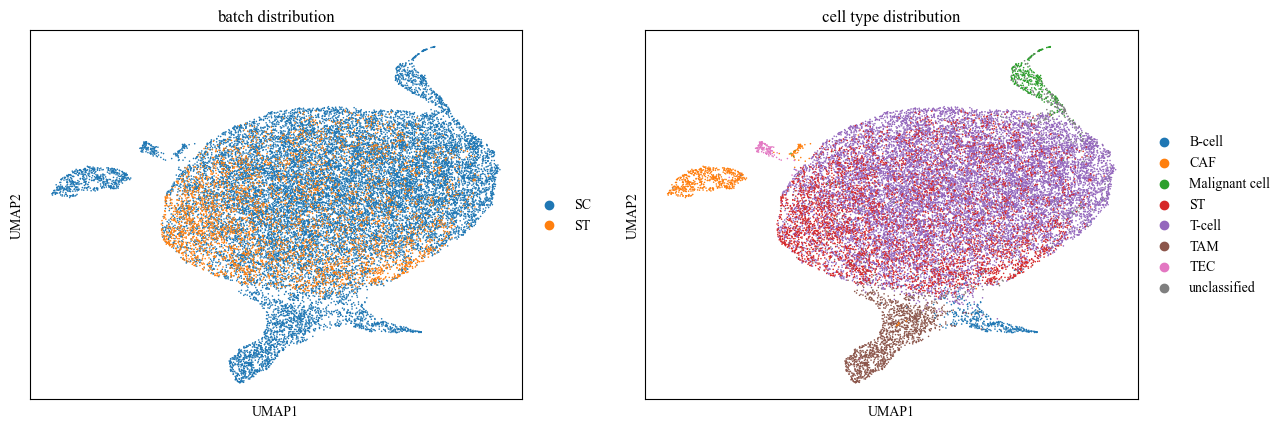

In [3]:
concat_adata = sc.concat((sc_adata, st_adata), label='batch', keys=['SC', 'ST'])
sc.pp.neighbors(concat_adata, use_rep='embedding')
sc.tl.umap(concat_adata)
sc.pl.umap(concat_adata, color=['batch', 'cluster'], title=['batch distribution', 'cell type distribution'])